# PyCaret (Low Code program)
# Preprocessing
- https://pycaret.org
- https://pycaret.org/preprocessing/

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check version
from pycaret.utils import version
version()

'2.2.3'

In [3]:
# Importing dataset
from pycaret.datasets import get_data
df = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from pycaret.classification import *
reg1 = setup(data = df, target = 'Class variable', 
             silent=True, 
             train_size = 0.5)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:52:07
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [5]:
reg1[4]

{'USI',
 'X',
 'X_test',
 'X_train',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_available_plots',
 '_gpu_n_jobs_param',
 '_internal_pipeline',
 '_ml_usecase',
 'create_model_container',
 'data_before_preprocess',
 'display_container',
 'exp_name_log',
 'experiment__',
 'fix_imbalance_method_param',
 'fix_imbalance_param',
 'fold_generator',
 'fold_groups_param',
 'fold_param',
 'fold_shuffle_param',
 'gpu_param',
 'html_param',
 'imputation_classifier',
 'imputation_regressor',
 'iterative_imputation_iters_param',
 'log_plots_param',
 'logging_param',
 'master_model_container',
 'n_jobs_param',
 'prep_pipe',
 'pycaret_globals',
 'seed',
 'stratify_param',
 'target_param',
 'transform_target_method_param',
 'transform_target_param',
 'y',
 'y_test',
 'y_train'}

In [6]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [7]:
from pycaret.datasets import get_data
hepatitis = get_data('hepatitis')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [8]:
summary(hepatitis)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
Class,int64,154,0,2
AGE,int64,154,0,49
SEX,int64,154,0,2
STEROID,float64,153,1,2
ANTIVIRALS,int64,154,0,2
FATIGUE,int64,154,0,2
MALAISE,int64,154,0,2
ANOREXIA,int64,154,0,2
LIVER BIG,float64,145,9,2
LIVER FIRM,float64,144,10,2


In [9]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = hepatitis, target = 'Class')

,Description,Value
0,session_id,415
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(154, 20)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


# Feature Engineering
https://pycaret.org/feature-interaction/

## 1. Feature Interaction (x1*x2, x1/x2)
### 모든 변수에 대해 교호작용을 계산하는 것이 아니라 pipeline 로직이 있음

In [11]:
from pycaret.datasets import get_data
insurance = get_data('insurance')
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = insurance, target = 'charges', feature_interaction = True, feature_ratio = True)

,Description,Value
0,session_id,8861
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 18)"


In [12]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
for i in range(len(reg1)):
    reg1[i]

10

KFold(n_splits=10, random_state=8861, shuffle=False)

True

{'USI',
 'X',
 'X_test',
 'X_train',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_available_plots',
 '_gpu_n_jobs_param',
 '_internal_pipeline',
 '_ml_usecase',
 'create_model_container',
 'data_before_preprocess',
 'display_container',
 'exp_name_log',
 'experiment__',
 'fix_imbalance_method_param',
 'fix_imbalance_param',
 'fold_generator',
 'fold_groups_param',
 'fold_param',
 'fold_shuffle_param',
 'gpu_param',
 'html_param',
 'imputation_classifier',
 'imputation_regressor',
 'iterative_imputation_iters_param',
 'log_plots_param',
 'logging_param',
 'master_model_container',
 'n_jobs_param',
 'prep_pipe',
 'pycaret_globals',
 'seed',
 'stratify_param',
 'target_param',
 'transform_target_method_param',
 'transform_target_param',
 'y',
 'y_test',
 'y_train'}

-1

Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)

{'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x25539113c10>,
 'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x25539113c40>,
 'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x25539113c70>,
 'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x25539113ca0>,
 'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x25539113cd0>,
 'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x25539113d60>}

517      8413.462891
1256    11436.738281
33      13770.097656
706     44400.406250
295      1704.568115
            ...     
274      2523.169434
10       2721.320801
696     29186.482422
226      2689.495361
933      7348.142090
Name: charges, Length: 402, dtype: float32

'lightgbm'

{'lr': <pycaret.containers.models.regression.LinearRegressionContainer at 0x25538ec2190>,
 'lasso': <pycaret.containers.models.regression.LassoRegressionContainer at 0x25538ec2ca0>,
 'ridge': <pycaret.containers.models.regression.RidgeRegressionContainer at 0x25538ec2a90>,
 'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x25538ec2850>,
 'lar': <pycaret.containers.models.regression.LarsContainer at 0x25538ec2760>,
 'llar': <pycaret.containers.models.regression.LassoLarsContainer at 0x25538ec2c70>,
 'omp': <pycaret.containers.models.regression.OrthogonalMatchingPursuitContainer at 0x25538ec29a0>,
 'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x25538ec2d30>,
 'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x255390e30a0>,
 'par': <pycaret.containers.models.regression.PassiveAggressiveRegressorContainer at 0x255390e3400>,
 'ransac': <pycaret.containers.models.regression.RANSACRegressorContainer at 0x25539

-1

8861

{'parameter': 'Hyperparameters',
 'residuals': 'Residuals',
 'error': 'Prediction Error',
 'cooks': 'Cooks Distance',
 'rfe': 'Feature Selection',
 'learning': 'Learning Curve',
 'manifold': 'Manifold Learning',
 'vc': 'Validation Curve',
 'feature': 'Feature Importance',
 'feature_all': 'Feature Importance (All)',
 'tree': 'Decision Tree'}

False

5

[]

'reg-default-name'

False

False

False

False

{'lr': <pycaret.containers.models.regression.LinearRegressionContainer at 0x25538e6e310>,
 'lasso': <pycaret.containers.models.regression.LassoRegressionContainer at 0x25538e850a0>,
 'ridge': <pycaret.containers.models.regression.RidgeRegressionContainer at 0x25538e85ca0>,
 'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x25538e85ee0>,
 'lar': <pycaret.containers.models.regression.LarsContainer at 0x25538e85190>,
 'llar': <pycaret.containers.models.regression.LassoLarsContainer at 0x25538e85ac0>,
 'omp': <pycaret.containers.models.regression.OrthogonalMatchingPursuitContainer at 0x25538e85160>,
 'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x25538e85fd0>,
 'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x25538eae310>,
 'par': <pycaret.containers.models.regression.PassiveAggressiveRegressorContainer at 0x25538eaeaf0>,
 'ransac': <pycaret.containers.models.regression.RANSACRegressorContainer at 0x25538

False

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_multiply_smoker_yes,bmi_divide_age,smoker_yes_multiply_bmi,bmi_multiply_age
0,19.0,27.900000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.90,1.468421,27.90,530.099976
1,18.0,33.770000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.876111,0.00,607.859985
2,28.0,33.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.178571,0.00,924.000000
3,33.0,22.705000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.688030,0.00,749.265015
4,32.0,28.879999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.902500,0.00,924.159973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.969999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.619400,0.00,1548.500000
1334,18.0,31.920000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,1.773333,0.00,574.559998
1335,18.0,36.849998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2.047222,0.00,663.299988
1336,21.0,25.799999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,1.228571,0.00,541.799988


0       16884.923828
1        1725.552246
2        4449.461914
3       21984.470703
4        3866.855225
            ...     
1333    10600.547852
1334     2205.980713
1335     1629.833496
1336     2007.944946
1337    29141.359375
Name: charges, Length: 1338, dtype: float32

'charges'

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='charges')),
                ('fix_perfect', Remove_100(target='charges')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multi

False

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_multiply_smoker_yes,bmi_divide_age,smoker_yes_multiply_bmi,bmi_multiply_age
258,51.0,24.415001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.478726,0.00,1245.165039
626,36.0,28.879999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.802222,0.00,1039.679932
88,46.0,27.740000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.603043,0.00,1276.040039
576,22.0,26.840000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.220000,0.00,590.479980
199,64.0,39.330002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.614531,0.00,2517.120117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,49.0,25.840000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.84,0.527347,25.84,1266.160034
385,19.0,34.400002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,1.810526,0.00,653.600037
1192,58.0,32.395000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.558535,0.00,1878.910034
751,21.0,28.975000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.379762,0.00,608.475037


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_multiply_smoker_yes,bmi_divide_age,smoker_yes_multiply_bmi,bmi_multiply_age
517,45.0,30.495001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.677667,0.000000,1372.275024
1256,51.0,36.384998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.713431,0.000000,1855.634888
33,63.0,28.309999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.449365,0.000000,1783.529907
706,51.0,38.060001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,38.060001,0.746275,38.060001,1941.060059
295,18.0,22.990000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.277222,0.000000,413.820007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,25.0,27.549999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.102000,0.000000,688.750000
10,25.0,26.219999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.048800,0.000000,655.500000
696,53.0,32.299999,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.609434,0.000000,1711.899902
226,28.0,38.060001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.359286,0.000000,1065.680054


'ce68'

[('Setup Config',
                                 Description             Value
  0                               session_id              8861
  1                                   Target           charges
  2                            Original Data         (1338, 7)
  3                           Missing Values             False
  4                         Numeric Features                 2
  5                     Categorical Features                 4
  6                         Ordinal Features             False
  7                High Cardinality Features             False
  8                  High Cardinality Method              None
  9                    Transformed Train Set         (936, 18)
  10                    Transformed Test Set         (402, 18)
  11                      Shuffle Train-Test              True
  12                     Stratify Train-Test             False
  13                          Fold Generator             KFold
  14                             Fold

[]

'box-cox'

'lightgbm'

<MLUsecase.REGRESSION: 2>

258     11520.099609
626      6748.591309
88       8026.666504
576      1664.999634
199     14901.516602
            ...     
545     23807.240234
385      1261.859009
1192    13019.161133
751      1906.358276
925     25333.332031
Name: charges, Length: 936, dtype: float32

In [14]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [15]:
insurance.columns
summary(insurance)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
age,int64,1338,0,47
sex,object,1338,0,2
bmi,float64,1338,0,548
children,int64,1338,0,6
smoker,object,1338,0,2
region,object,1338,0,4
charges,float64,1338,0,1337


In [16]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## 2. Polynomial Features

### 모든 변수에 대해 교호작용을 계산하는 것이 아니라 pipeline 로직이 있음

In [17]:
from pycaret.datasets import get_data
juice = get_data('juice')
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = juice, target = 'Purchase', polynomial_features = True)

,Description,Value
0,session_id,8495
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
clf1[23]

False

In [19]:
juice.head(3)
clf1[2].head(3)

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.50,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.60,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.68,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1


AttributeError: 'StratifiedKFold' object has no attribute 'head'

## 3. Trigonometry Features
### polynomial과 같이 사용하여 삼각함수 변수 생성

In [20]:
insurance = get_data('insurance')
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = insurance, target = 'charges', trigonometry_features = True)

,Description,Value
0,session_id,945
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [21]:
reg1[4].columns

AttributeError: 'set' object has no attribute 'columns'

## 4. Group Features

In [22]:
titanic = get_data('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
clf1 = setup(data = titanic, target = 'Survived', 
             group_features = ['Age', 'Fare'],
             group_names = ['Age', 'Fare'])

,Description,Value
0,session_id,2635
1,Target,Survived
2,Original Data,"(891, 12)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(623, 725)"


In [24]:
clf1[4]

{'USI',
 'X',
 'X_test',
 'X_train',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_available_plots',
 '_gpu_n_jobs_param',
 '_internal_pipeline',
 '_ml_usecase',
 'create_model_container',
 'data_before_preprocess',
 'display_container',
 'exp_name_log',
 'experiment__',
 'fix_imbalance_method_param',
 'fix_imbalance_param',
 'fold_generator',
 'fold_groups_param',
 'fold_param',
 'fold_shuffle_param',
 'gpu_param',
 'html_param',
 'imputation_classifier',
 'imputation_regressor',
 'iterative_imputation_iters_param',
 'log_plots_param',
 'logging_param',
 'master_model_container',
 'n_jobs_param',
 'prep_pipe',
 'pycaret_globals',
 'seed',
 'stratify_param',
 'target_param',
 'transform_target_method_param',
 'transform_target_param',
 'y',
 'y_test',
 'y_train'}

## 5. Bin Numeric Features

In [25]:
clf1 = setup(data = titanic.drop('Name', axis=1), target = 'Survived', 
             bin_numeric_features = ['Age'])
clf1[4]

,Description,Value
0,session_id,4567
1,Target,Survived
2,Original Data,"(891, 11)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(623, 573)"


{'USI',
 'X',
 'X_test',
 'X_train',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_available_plots',
 '_gpu_n_jobs_param',
 '_internal_pipeline',
 '_ml_usecase',
 'create_model_container',
 'data_before_preprocess',
 'display_container',
 'exp_name_log',
 'experiment__',
 'fix_imbalance_method_param',
 'fix_imbalance_param',
 'fold_generator',
 'fold_groups_param',
 'fold_param',
 'fold_shuffle_param',
 'gpu_param',
 'html_param',
 'imputation_classifier',
 'imputation_regressor',
 'iterative_imputation_iters_param',
 'log_plots_param',
 'logging_param',
 'master_model_container',
 'n_jobs_param',
 'prep_pipe',
 'pycaret_globals',
 'seed',
 'stratify_param',
 'target_param',
 'transform_target_method_param',
 'transform_target_param',
 'y',
 'y_test',
 'y_train'}

## 6. Combine Rare Levels

In [26]:
income = get_data('income')
summary(income)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
age,int64,32561,0,73
workclass,object,30725,1836,8
education,object,32561,0,16
education-num,int64,32561,0,16
marital-status,object,32561,0,7
occupation,object,30718,1843,14
relationship,object,32561,0,6
race,object,32561,0,5
sex,object,32561,0,2
capital-gain,int64,32561,0,119


<AxesSubplot:>

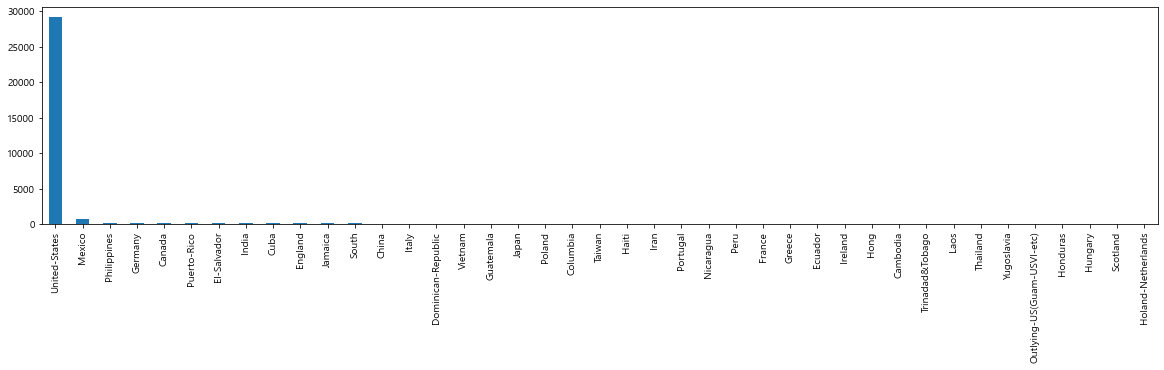

In [27]:
income['native-country'].value_counts().plot(kind='bar', figsize= (20,4))

In [28]:
# Importing module and initializing setup
clf1 = setup(data = income, target = 'income >50K', 
             silent=True,
             combine_rare_levels = True)
clf1[4]

,Description,Value
0,session_id,262
1,Target,income >50K
2,Original Data,"(32561, 14)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22792, 95)"


{'USI',
 'X',
 'X_test',
 'X_train',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_available_plots',
 '_gpu_n_jobs_param',
 '_internal_pipeline',
 '_ml_usecase',
 'create_model_container',
 'data_before_preprocess',
 'display_container',
 'exp_name_log',
 'experiment__',
 'fix_imbalance_method_param',
 'fix_imbalance_param',
 'fold_generator',
 'fold_groups_param',
 'fold_param',
 'fold_shuffle_param',
 'gpu_param',
 'html_param',
 'imputation_classifier',
 'imputation_regressor',
 'iterative_imputation_iters_param',
 'log_plots_param',
 'logging_param',
 'master_model_container',
 'n_jobs_param',
 'prep_pipe',
 'pycaret_globals',
 'seed',
 'stratify_param',
 'target_param',
 'transform_target_method_param',
 'transform_target_param',
 'y',
 'y_test',
 'y_train'}

# End